In [1]:
import os
os.chdir("./src/")
from nb import *
os.chdir("../")

In [2]:
# Train and Test Data
x_train = np.loadtxt('./data/imdb/imdb_train_text.txt',delimiter='\n',dtype='str',comments=None)
y_train = np.loadtxt('./data/imdb/imdb_train_labels.txt',delimiter='\n',dtype=np.int64)
x_test = np.loadtxt('./data/imdb/imdb_test_text.txt',delimiter='\n',dtype='str',comments=None)
y_test = np.loadtxt('./data/imdb/imdb_test_labels.txt',delimiter='\n',dtype=np.int64)
print("Loaded Train and Test Data")

# Create Dictionary
diction = get_diction(x_train,"./data/tmp/diction.pickle",case=False,save_data=True,load_data=True)

# Calculate Word Counts per Class
labels, label_counts = np.unique(y_train,return_counts=True)
class_label_map = dict(zip(labels,np.arange(labels.shape[0])))
word_counts_per_class = features_count(x_train,y_train,"./data/tmp/word_counts_per_class.pickle",diction,labels,class_label_map,classifierType="NB",featureMap=None,featureType="count",ngram_type=1,n=1,dtype=np.int64,case=False,save_data=True,load_data=True,featureName="Word counts")

# Calculate Parameters
theta = np.divide(word_counts_per_class+1,word_counts_per_class.sum(axis=1).reshape(-1,1)+len(diction.keys()))
phi = label_counts/y_train.shape[0]
log_theta = np.log(theta)
log_phi = np.log(phi)

# Train Accuracy
train_pred = accuracy(x_train,y_train,log_theta,log_phi,diction,labels,"NB",True,"Naive Bayes")

# Test Accuracy
test_pred = accuracy(x_test,y_test,log_theta,log_phi,diction,labels,"NB",False,"Naive Bayes")

del x_train,x_test,diction,word_counts_per_class

Loaded Train and Test Data
Dictionary loaded
Word counts loaded
Naive Bayes Train Accuracy = 0.68448
Naive Bayes Test Accuracy = 0.38752


In [3]:
# Random Accuracy
np.random.seed(0)
random_labels = np.random.randint(0,labels.shape[0],y_test.shape[0])
random_accuracy = (y_test == random_labels).sum()/float(y_test.shape[0])
print("Random accuracy = {0}".format(random_accuracy))

# MaxCount Accuracy
maxcount_accuracy = (y_test == labels[label_counts.argmax()]).sum()/float(y_test.shape[0])
print("MaxCount accuracy = {0}".format(maxcount_accuracy))

Random accuracy = 0.07264
MaxCount accuracy = 0.20088


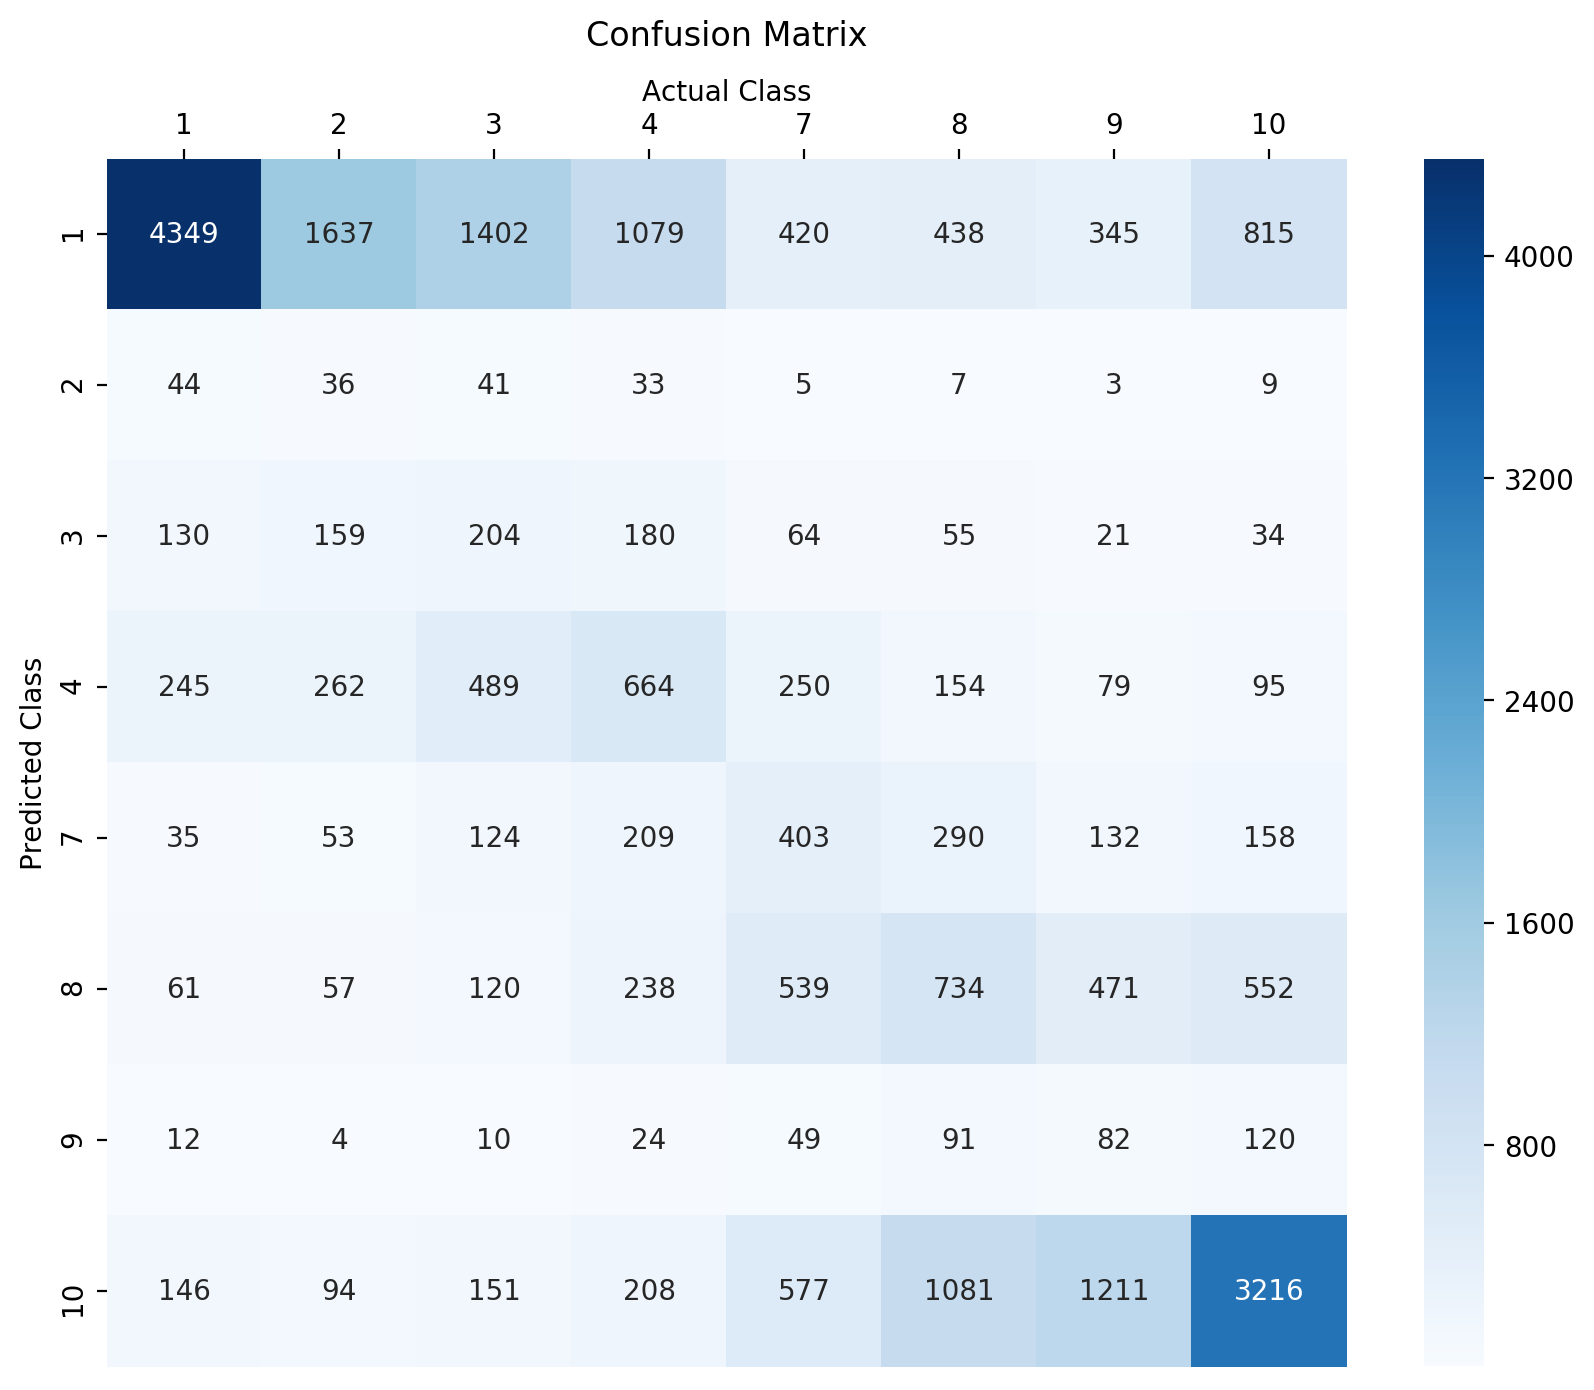

Micro F1 score = 0.2793
Macro F1 score = 0.7800


In [4]:
%matplotlib inline
mpl.rcParams['figure.dpi'] = 200

get_conf_matrix(y_test,test_pred,labels,class_label_map,True)

Loaded Stemmed Train and Test Data
Stemmed Dictionary loaded
Stemmed Word counts loaded
Stemmed Naive Bayes Train Accuracy = 0.6798
Stemmed Naive Bayes Test Accuracy = 0.38684


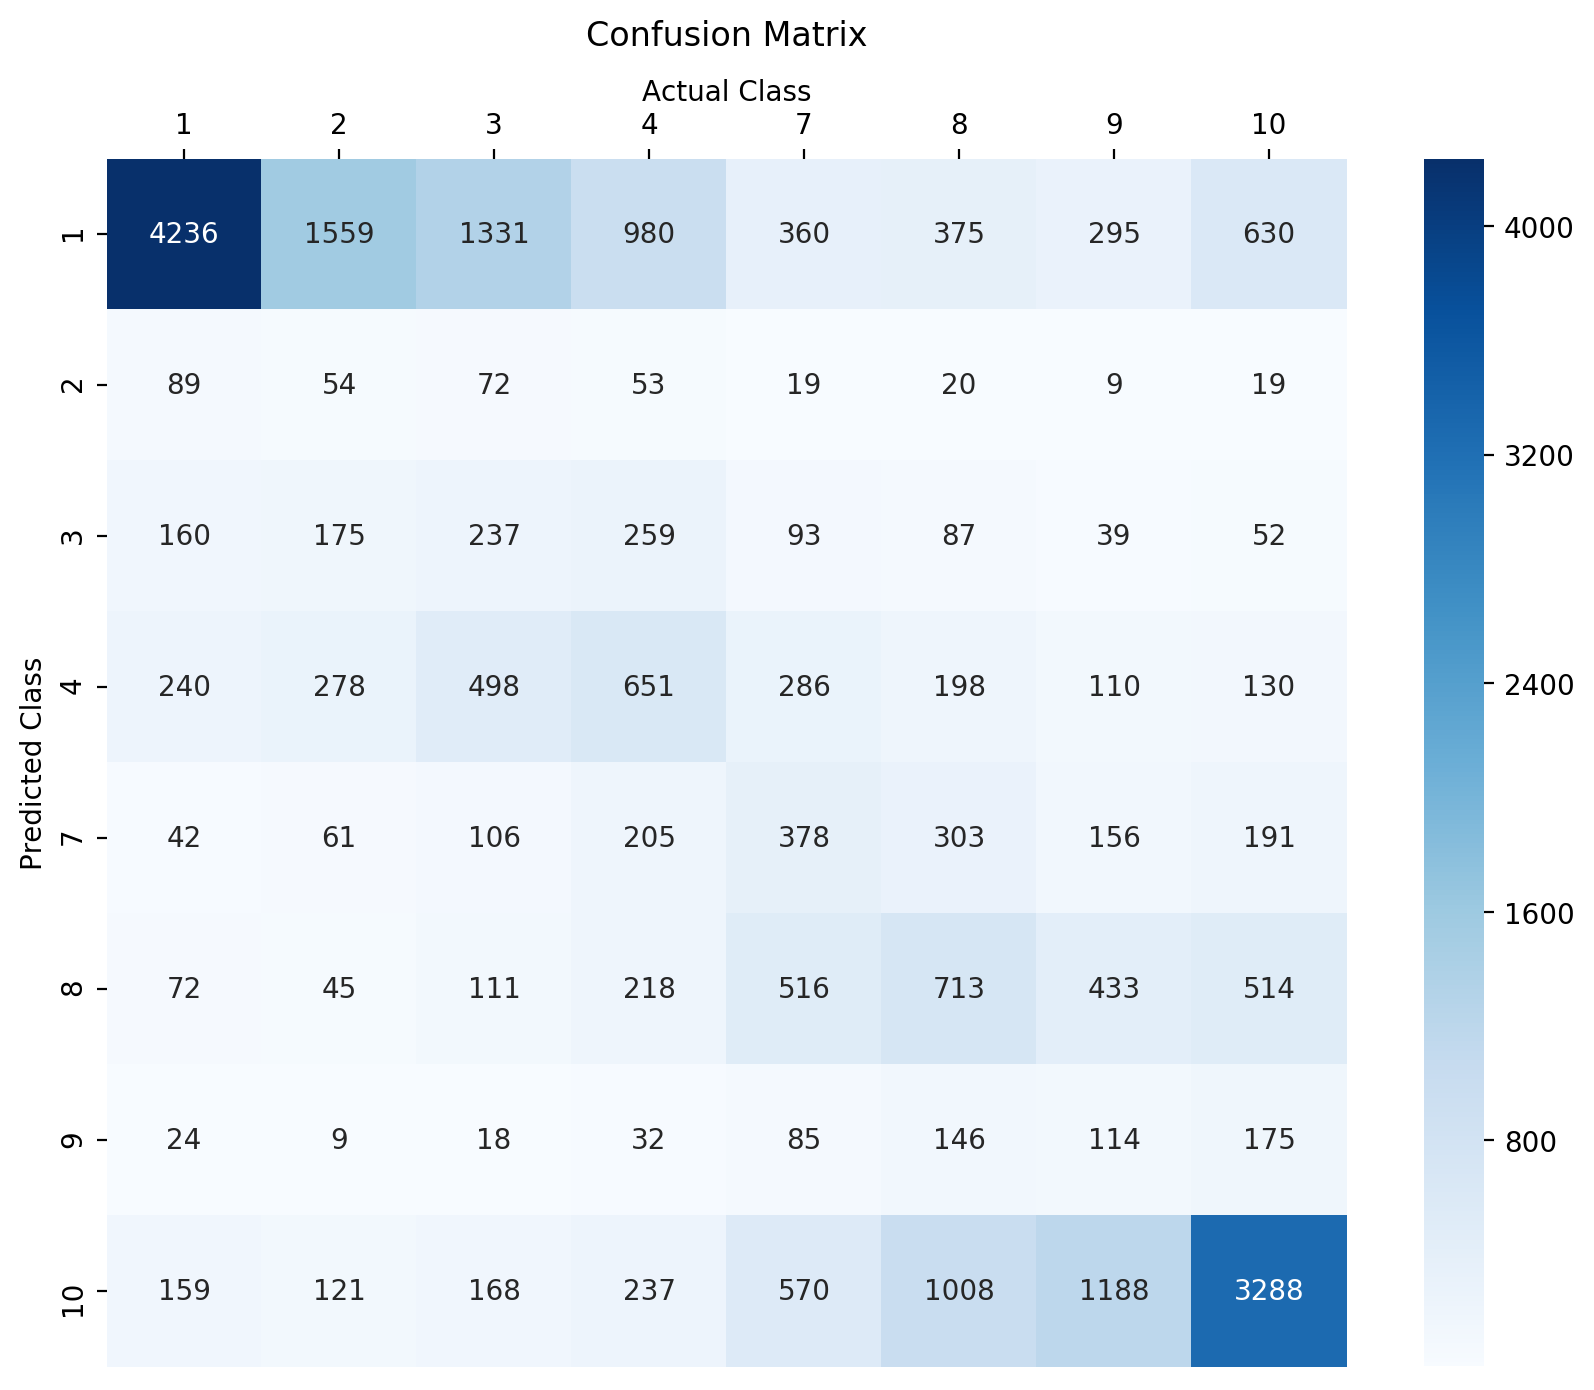

Micro F1 score = 0.2789
Macro F1 score = 0.7771


In [5]:
%matplotlib inline
mpl.rcParams['figure.dpi'] = 200

# Stemmed Train and Test Data
x_train = np.loadtxt('./data/imdb/stem_imdb_train_text.txt',delimiter='\n',dtype='str',comments=None)
x_test = np.loadtxt('./data/imdb/stem_imdb_test_text.txt',delimiter='\n',dtype='str',comments=None)
print("Loaded Stemmed Train and Test Data")

# Create Dictionary
diction = get_diction(x_train,"./data/tmp/stem_diction.pickle",case=False,save_data=True,load_data=True,dictName="Stemmed Dictionary")

# Calculate Stemmed Word Counts per Class
word_counts_per_class = features_count(x_train,y_train,"./data/tmp/stem_word_counts_per_class.pickle",diction,labels,class_label_map,classifierType="NB",featureMap=None,featureType="count",ngram_type=1,n=1,dtype=np.int64,case=False,save_data=True,load_data=True,featureName="Stemmed Word counts")

# Calculate Parameters
theta = np.divide(word_counts_per_class+1,word_counts_per_class.sum(axis=1).reshape(-1,1)+len(diction.keys()))
phi = label_counts/y_train.shape[0]
log_theta = np.log(theta)
log_phi = np.log(phi)

# Train Accuracy
train_pred = accuracy(x_train,y_train,log_theta,log_phi,diction,labels,"NB",True,"Stemmed Naive Bayes")

# Test Accuracy
test_pred = accuracy(x_test,y_test,log_theta,log_phi,diction,labels,"NB",False,"Stemmed Naive Bayes")

get_conf_matrix(y_test,test_pred,labels,class_label_map,True)

del diction,word_counts_per_class